In [13]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [5]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

image.shape: torch.Size([1, 28, 28])
Label: 5


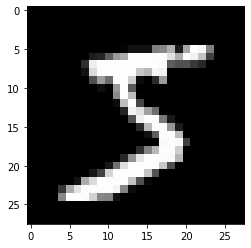

In [6]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

image.shape: torch.Size([1, 28, 28])
Label: 5


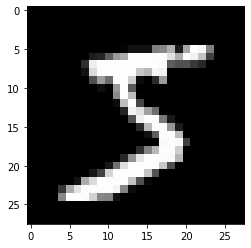

In [7]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [8]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [9]:
batch_size=128

In [10]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")
/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.

images.shape: torch.Size([128, 1, 28, 28])


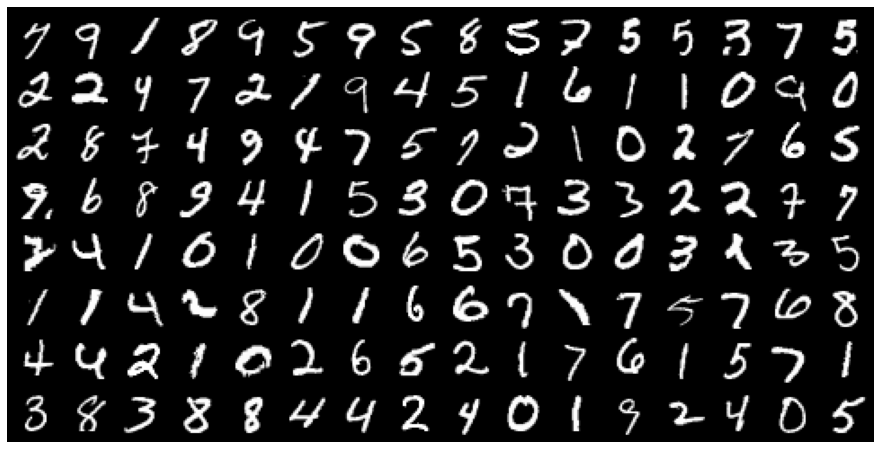

In [14]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [15]:
for images, labels in train_loader: #here we are reshaping the image
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)#the first is left for the computer to figure out
    print('inputs.shape:', inputs.shape)
    break

/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")
/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/hayat/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [16]:
input_size = inputs.shape[-1]
hidden_size = 32

In [17]:
layer1 = nn.Linear(input_size, hidden_size)

In [18]:
inputs.shape

torch.Size([128, 784])

In [19]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [21]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape #here the first layer captures the linear relationship between the elements
#now there will be an activation function that will be applied to introduce non-linearity

torch.Size([128, 32])

In [22]:
F.relu(torch.tensor([[1, -1, 0], #relu function returns only +ve no's
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [26]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())
#here we are applying the relu function on the outputs 2nd one

min(layer1_outputs): -0.6448858380317688
min(relu_outputs): 0.0


In [27]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [29]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)
inputs.shape

torch.Size([128, 10])


torch.Size([128, 784])

In [30]:
F.cross_entropy(layer2_outputs, labels)#now here we calculate the loss 

tensor(2.3052, grad_fn=<NllLossBackward0>)

In [31]:
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias
#the thing that is happening here is outputs of the first layer acts as an input to the next layer
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [32]:
 #In other words, introducing non-linearity makes the model more powerful and versatile
    #If we hadn't included a non-linear activation between the two linear layers, the final
    #relationship between inputs and outputs would still be linear.

In [33]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [34]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [35]:
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias